<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/Multi_output_classificaition_CNN_and_SVM_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DAiSEE.zip

In [201]:
import pandas as pd
lables = pd.read_csv('/content/DAiSEE/Labels/TrainLabels.csv')

val_lables = pd.read_csv('/content/DAiSEE/Labels/ValidationLabels.csv')


In [202]:
import glob 
videos = glob.glob("/content/DAiSEE/DataSet/Train/*/*/*")


In [203]:
val_videos = glob.glob("/content/DAiSEE/DataSet/Validation/*/*/*")


In [204]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
train_images = []
train_labels = []
i=0
for vid in videos[:]:
  # Opens the Video file
  cap= cv2.VideoCapture(vid)
  
  fr = 0
  while(fr <1):
    ret, frame = cap.read()
    if ret == False:
      break
    v = vid[-14:]
    
    if v in lables.ClipID.values:
      current_label = lables.loc[lables['ClipID'] == v]
      current_label = current_label.iloc[:,1:]
      
      train_labels.append(current_label.values)
      
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #convert to grayscale
      gray=np.asarray(Image.fromarray(gray).resize((48,48)))
      clahe_image = clahe.apply(gray)
      clahe_image=clahe_image.reshape(48*48)
      
      s=""
    
      for i in clahe_image:
        s=s+str(i)+" "
      train_images.append(s)
    fr+=1
    i+=1
  cap.release()
  cv2.destroyAllWindows()
  



In [205]:
import cv2
from PIL import Image
import numpy as np
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
val_images = []
val_labels = []
i=0
for vid_ in val_videos[:]:
  # Opens the Video file
  cap= cv2.VideoCapture(vid_)
  
  fr = 0
  while(fr <1):
    ret, frame = cap.read()
    if ret == False:
      break
    v = vid_[-14:]
    if v in val_lables.ClipID.values:
      current_label = val_lables.loc[val_lables['ClipID'] == v]
      current_label = current_label.iloc[:,1:]
      val_labels.append(current_label.values)
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #convert to grayscale
      gray=np.asarray(Image.fromarray(gray).resize((48,48)))
      clahe_image = clahe.apply(gray)
      clahe_image=clahe_image.reshape(48*48)
      s=""
    
      for i in clahe_image:
        s=s+str(i)+" "
      val_images.append(s)    
    fr+=1
    i+=1
  cap.release()
  cv2.destroyAllWindows()
  



In [206]:
boredom = []
Engagement = []
Confusion = []
Frustration = []
for l in train_labels:
  boredom.append(l[0][0])
  Engagement.append(l[0][1])
  Confusion.append(l[0][2])
  Frustration.append(l[0][3])

In [207]:
val_boredom = []
val_Engagement = []
val_Confusion = []
val_Frustration = []
for l in val_labels:
  val_boredom.append(l[0][0])
  val_Engagement.append(l[0][1])
  val_Confusion.append(l[0][2])
  val_Frustration.append(l[0][3])

In [208]:
df1 = pd.DataFrame(
    {
        'pixels': train_images
    }
)
for l in train_labels:
  df1['Boredom'] = boredom


df2 = pd.DataFrame(
    {
        'pixels': train_images
    }
)
for l in train_labels:
  df2['Engagement'] = Engagement

df3 = pd.DataFrame(
    {
        'pixels': train_images
    }
)
for l in train_labels:
  df3['Confusion'] = Confusion
  

df4 = pd.DataFrame(
    {
        'pixels': train_images
    }
)
for l in train_labels:
  df4['Frustration'] = Frustration

In [209]:
val_df1 = pd.DataFrame(
    {
        'pixels': val_images
    }
)
for l in val_labels:
  val_df1['Boredom'] = val_boredom

val_df2 = pd.DataFrame(
    {
        'pixels': val_images
    }
)
for l in val_labels:
  val_df2['Engagement'] = val_Engagement


val_df3 = pd.DataFrame(
    {
        'pixels': val_images
    }
)
for l in val_labels:
  val_df3['Confusion'] = val_Confusion

val_df4 = pd.DataFrame(
    {
        'pixels': val_images
    }
)
for l in val_labels:
  val_df4['Frustration'] = val_Frustration

In [210]:
import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.utils import shuffle
%matplotlib inline

data1=shuffle(df1)
data2=shuffle(df2)
data3=shuffle(df3)
data4=shuffle(df4)
val_data1 = shuffle(val_df1)
val_data2 = shuffle(val_df2)
val_data3 = shuffle(val_df3)
val_data4 = shuffle(val_df4)


In [211]:
num_classes = 4
emotion_labels = ['Boredm','Confusion','Engagement','Frustration']
classes=np.array(('0','1','2','3'))

In [212]:
train_set1 = data1 
train_set1=shuffle(train_set1)
train_set2 = data2 
train_set2=shuffle(train_set2)
train_set3 = data3 
train_set3=shuffle(train_set3)
train_set4 = data4 
train_set4=shuffle(train_set4)
val_set1 = val_data1
val_set1=shuffle(val_set1)
val_set2 = val_data2
val_set2=shuffle(val_set2)
val_set3 = val_data3
val_set3=shuffle(val_set3)
val_set4 = val_data4
val_set4=shuffle(val_set4)


In [213]:
X_train1 = np.array(list(map(str.split, train_set1.pixels)), np.float32)
X_val1 = np.array(list(map(str.split, val_set1.pixels)), np.float32) 
X_train1 = X_train1.reshape(X_train1.shape[0], 48,48) 
X_val1 = X_val1.reshape(X_val1.shape[0], 48,48)
print(X_train1.shape, X_val1.shape,sep='\n')


(4903, 48, 48)
(1400, 48, 48)


In [214]:
X_train2 = np.array(list(map(str.split, train_set2.pixels)), np.float32)
X_val2 = np.array(list(map(str.split, val_set2.pixels)), np.float32) 
X_train2 = X_train2.reshape(X_train2.shape[0], 48,48) 
X_val2 = X_val2.reshape(X_val2.shape[0], 48,48)
print(X_train2.shape, X_val2.shape,sep='\n')


(4903, 48, 48)
(1400, 48, 48)


In [215]:
X_train3 = np.array(list(map(str.split, train_set3.pixels)), np.float32)
X_val3 = np.array(list(map(str.split, val_set3.pixels)), np.float32) 
X_train3 = X_train3.reshape(X_train3.shape[0], 48,48) 
X_val3 = X_val3.reshape(X_val3.shape[0], 48,48)
print(X_train3.shape, X_val3.shape,sep='\n')


(4903, 48, 48)
(1400, 48, 48)


In [216]:
X_train4 = np.array(list(map(str.split, train_set4.pixels)), np.float32)
X_val4 = np.array(list(map(str.split, val_set4.pixels)), np.float32) 
X_train4 = X_train4.reshape(X_train4.shape[0], 48,48) 
X_val4 = X_val4.reshape(X_val4.shape[0], 48,48)
print(X_train4.shape, X_val4.shape,sep='\n')


(4903, 48, 48)
(1400, 48, 48)


In [217]:
y_train1 = train_set1.Boredom
y_train1 = np_utils.to_categorical(y_train1, num_classes) 
y_val1 = val_set1.Boredom 
y_val1 = np_utils.to_categorical(y_val1, num_classes) 

In [218]:
y_train2 = train_set2.Engagement
y_train2 = np_utils.to_categorical(y_train2, num_classes) 
y_val2 = val_set2.Engagement
y_val2 = np_utils.to_categorical(y_val2, num_classes) 

In [219]:
y_train3 = train_set3.Confusion
y_train3 = np_utils.to_categorical(y_train3, num_classes) 
y_val3 = val_set3.Confusion
y_val3 = np_utils.to_categorical(y_val3, num_classes) 

In [220]:
y_train4 = train_set4.Frustration
y_train4 = np_utils.to_categorical(y_train4, num_classes) 
y_val4 = val_set4.Frustration
y_val4 = np_utils.to_categorical(y_val4, num_classes) 

In [221]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import LeakyReLU
width=48
height=48
model1 = Sequential()
num_features=32
model1.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model1.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model1.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Flatten())
model1.add(Dense(256))
model1.add(LeakyReLU(alpha=0.05))
model1.add(Dense(128))
model1.add(LeakyReLU(alpha=0.05))
model1.add(Dense(64))
model1.add(LeakyReLU(alpha=0.05))
model1.add(Dropout(0.2))
model1.add(Dense(64))
model1.add(LeakyReLU(alpha=0.05))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [222]:
model2 = Sequential()
num_features=32
model2.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model2.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model2.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(LeakyReLU(alpha=0.05))
model2.add(Dense(128))
model2.add(LeakyReLU(alpha=0.05))
model2.add(Dense(64))
model2.add(LeakyReLU(alpha=0.05))
model2.add(Dropout(0.2))
model2.add(Dense(64))
model2.add(LeakyReLU(alpha=0.05))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [223]:
model3 = Sequential()
num_features=32
model3.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model3.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model3.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model3.add(Flatten())
model3.add(Dense(256))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(128))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(64))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dropout(0.2))
model3.add(Dense(64))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [224]:
model4 = Sequential()

num_features=32
model4.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model4.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model4.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model4.add(Flatten())
model4.add(Dense(256))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dense(128))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dense(64))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dropout(0.2))
model4.add(Dense(64))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [225]:
#fit model1
nb_epoch =20
batch_size = 64
history1 = model1.fit(X_train1,y_train1, epochs=nb_epoch,
          validation_data=(X_val1,y_val1), shuffle=True, verbose=0)

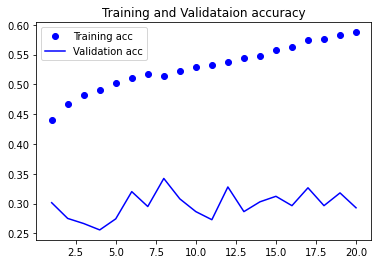

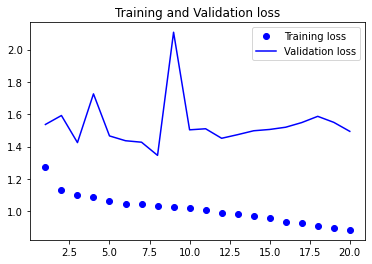

In [226]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [227]:
#fit model2
nb_epoch =25
batch_size = 64
history2 = model2.fit(X_train2,y_train2, epochs=nb_epoch,
          validation_data=(X_val2,y_val2), shuffle=True, verbose=0)

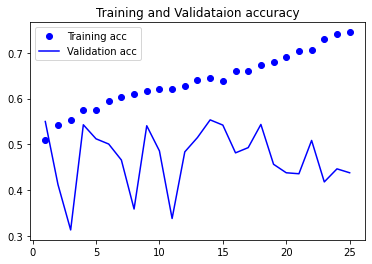

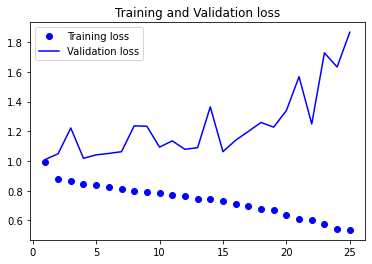

In [228]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [229]:
#fit model3
nb_epoch =25
batch_size = 64
history3 = model3.fit(X_train3,y_train3, epochs=nb_epoch,
          validation_data=(X_val3,y_val3), shuffle=True, verbose=0)

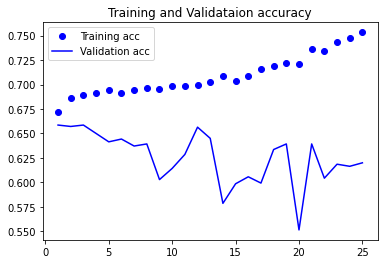

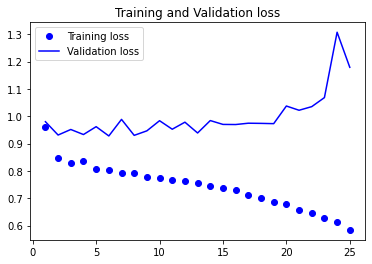

In [230]:
import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [231]:
#fit model4
nb_epoch =25
batch_size = 64
history4 = model4.fit(X_train4,y_train4, epochs=nb_epoch,
          validation_data=(X_val4,y_val4), shuffle=True, verbose=0)

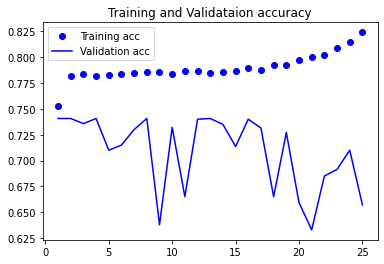

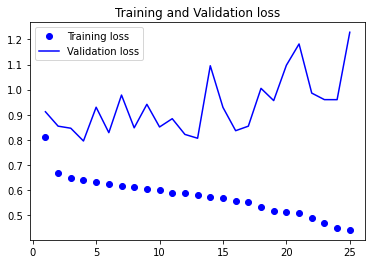

In [232]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [233]:
model_1=Model(inputs=model1.input,outputs=model1.layers[-6].output)
model_2=Model(inputs=model2.input,outputs=model2.layers[-6].output)
model_3=Model(inputs=model3.input,outputs=model3.layers[-6].output)
model_4=Model(inputs=model4.input,outputs=model4.layers[-6].output)

In [234]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear', verbose=True,probability=True, tol=1e-3)

clf2 = SVC(kernel='linear', verbose=True,probability=True, tol=1e-3)

clf3 = SVC(kernel='linear', verbose=True,probability=True, tol=1e-3)

clf4 = SVC(kernel='linear', verbose=True,probability=True, tol=1e-3)

In [235]:
val_labs1=np.asarray([np.argmax(i) for i in y_val1])
train_labs1=np.asarray([np.argmax(i) for i in y_train1])

In [236]:
val_labs2=np.asarray([np.argmax(i) for i in y_val2])
train_labs2=np.asarray([np.argmax(i) for i in y_train2])

In [237]:
val_labs3=np.asarray([np.argmax(i) for i in y_val3])
train_labs3=np.asarray([np.argmax(i) for i in y_train3])

In [238]:
val_labs4=np.asarray([np.argmax(i) for i in y_val4])
train_labs4=np.asarray([np.argmax(i) for i in y_train4])

In [239]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')

    plt.show()

In [240]:
import dlib
import math
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks (1).dat")
def get_landmarks(image):
    dlibRect =[dlib.rectangle(0, 48, 48, 0)] 
    for d in dlibRect: #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        return np.asarray(landmarks_vectorised)

In [241]:
def get_hand_features(data):
  print("getting Handcrafted Features.............")
  l=[]
  for i in data:
    z=i.reshape(48,48)
    z=z.astype('uint8')
    l.append(get_landmarks(z))
  return np.asarray(l)

In [242]:
def append_CNN_hand(cnn_features,hand_features):
  print("Merging Both Fearures.............")
  if cnn_features.shape[0]!=hand_features.shape[0]:
    return 'shape not equal'
  else:
    l=[]
    for i in range(cnn_features.shape[0]):
      k=np.append(cnn_features[i],hand_features[i])
      l.append(k)
    return np.asarray(l)

In [243]:
model_1.save('/content/drive/My Drive/Project/Model_for_daisee_less_arch_FC.hdf5')

Training the classifier........
[LibSVM]time taken:  0.34722304344177246


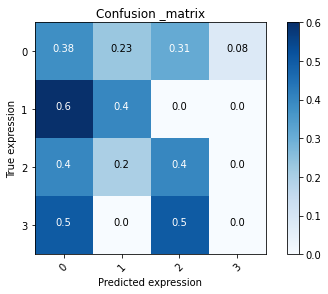

obtained_accuracy:  0.36


In [244]:
#only CNN
import time
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=model_1.predict(X_train1[:100])
  val_data=model_1.predict(X_val1[:25])
  clf1.fit(train_data,train_labs1[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf1.score(val_data,val_labs1[:25])
  plot_confusion_matrix(val_labs1[:25],clf1.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
[LibSVM]time taken:  0.32033586502075195


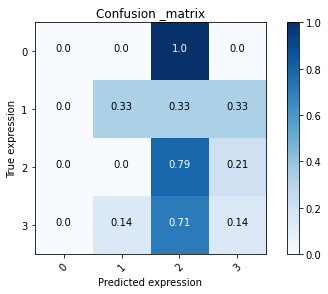

obtained_accuracy:  0.52


In [245]:
#only CNN
import time
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=model_1.predict(X_train2[:100])
  val_data=model_1.predict(X_val2[:25])
  clf2.fit(train_data,train_labs2[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf2.score(val_data,val_labs2[:25])
  plot_confusion_matrix(val_labs2[:25],clf2.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
[LibSVM]time taken:  0.35421156883239746


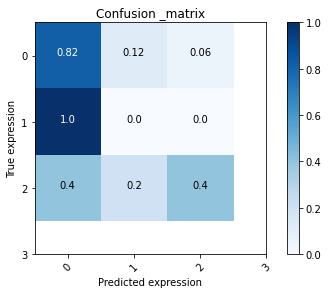

obtained_accuracy:  0.64


In [246]:
#only CNN
import time
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=model_3.predict(X_train3[:100])
  val_data=model_3.predict(X_val3[:25])
  clf3.fit(train_data,train_labs3[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf3.score(val_data,val_labs3[:25])
  plot_confusion_matrix(val_labs3[:25],clf3.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
[LibSVM]time taken:  0.37940526008605957


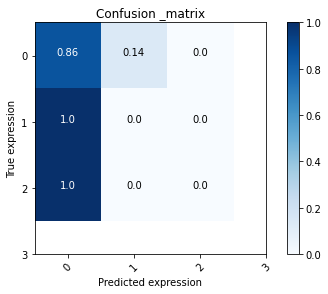

obtained_accuracy:  0.72


In [247]:
#only CNN
import time
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=model_4.predict(X_train4[:100])
  val_data=model_4.predict(X_val4[:25])
  clf4.fit(train_data,train_labs4[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf4.score(val_data,val_labs4[:25])
  plot_confusion_matrix(val_labs4[:25],clf4.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

In [248]:
val_data=model_1.predict(X_val1[:1])
ans1=clf1.predict(val_data)

In [249]:
val_data2=model_2.predict(X_val1[:1])
ans2=clf2.predict(val_data2)

In [250]:
val_data3=model_3.predict(X_val1[:1])
ans3=clf3.predict(val_data3)

In [251]:
val_data4=model_4.predict(X_val1[:1])
ans4=clf4.predict(val_data4)

In [252]:
print('Prediction Using CNN features \n for pixel {} \n the answer are boredom = {}, Engagement = {}, Confusion = {}, Frustration = {}'.format(X_val1[:1], ans1, ans2, ans3, ans4))

Prediction Using CNN features 
 for pixel [[[156. 184. 184. ... 220. 220. 212.]
  [149. 170. 177. ... 220. 212. 212.]
  [120. 135. 170. ... 220. 220. 212.]
  ...
  [156. 156. 156. ... 149. 212. 220.]
  [142. 156. 156. ... 106. 163. 220.]
  [135. 142. 142. ...  92. 135. 191.]]] 
 the answer are boredom = [0], Engagement = [1], Confusion = [1], Frustration = [0]


Training the classifier........
getting Handcrafted Features.............
getting Handcrafted Features.............
[LibSVM]time taken:  0.7775936126708984


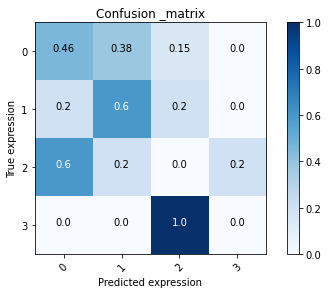

obtained_accuracy:  0.36


In [253]:
#only Handy
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=get_hand_features(X_train1[:100])                                                         
  val_data=get_hand_features(X_val1[:25])
  clf1.fit(train_data,train_labs1[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf1.score(val_data,val_labs1[:25])
  plot_confusion_matrix(val_labs1[:25],clf1.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
getting Handcrafted Features.............
getting Handcrafted Features.............
[LibSVM]time taken:  0.9462156295776367


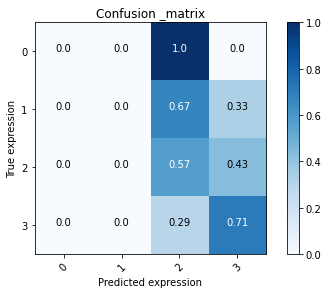

obtained_accuracy:  0.52


In [254]:
#only Handy
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=get_hand_features(X_train2[:100])                                                         
  val_data=get_hand_features(X_val2[:25])
  clf2.fit(train_data,train_labs2[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf2.score(val_data,val_labs2[:25])
  plot_confusion_matrix(val_labs2[:25],clf2.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
getting Handcrafted Features.............
getting Handcrafted Features.............
[LibSVM]time taken:  0.5782573223114014


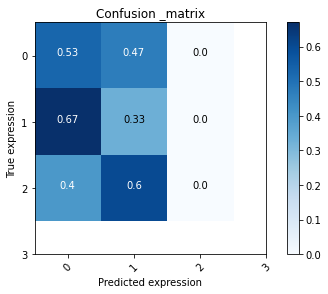

obtained_accuracy:  0.4


In [255]:
#only Handy
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=get_hand_features(X_train3[:100])                                                         
  val_data=get_hand_features(X_val3[:25])
  clf3.fit(train_data,train_labs3[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf3.score(val_data,val_labs3[:25])
  plot_confusion_matrix(val_labs3[:25],clf3.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
getting Handcrafted Features.............
getting Handcrafted Features.............
[LibSVM]time taken:  0.7111244201660156


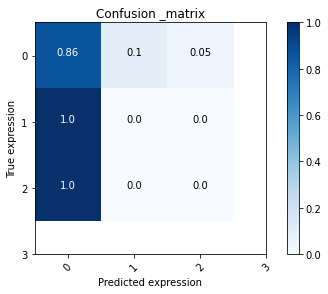

obtained_accuracy:  0.72


In [256]:
#only Handy
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=get_hand_features(X_train4[:100])                                                         
  val_data=get_hand_features(X_val4[:25])
  clf4.fit(train_data,train_labs4[:100])
  print('time taken: ',time.time()-s)
  pred_lin = clf4.score(val_data,val_labs4[:25])
  plot_confusion_matrix(val_labs4[:25],clf4.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

In [257]:
val_data=get_hand_features(X_val1[:1])
ans1 = clf1.predict(val_data)
ans1

getting Handcrafted Features.............


array([1])

In [258]:
val_data=get_hand_features(X_val2[:1])
ans2 = clf2.predict(val_data)
ans2

getting Handcrafted Features.............


array([3])

In [259]:
val_data=get_hand_features(X_val3[:1])
ans3 = clf3.predict(val_data)
ans3

getting Handcrafted Features.............


array([1])

In [260]:
val_data=get_hand_features(X_val4[:1])
ans4 = clf4.predict(val_data)
ans4

getting Handcrafted Features.............


array([0])

In [261]:
print('Prediction Using Hand Crafted features \n for pixel {} \n the answer are boredom = {}, Engagement = {}, Confusion = {}, Frustration = {}'.format(X_val1[:1], ans1, ans2, ans3, ans4))

Prediction Using Hand Crafted features 
 for pixel [[[156. 184. 184. ... 220. 220. 212.]
  [149. 170. 177. ... 220. 212. 212.]
  [120. 135. 170. ... 220. 220. 212.]
  ...
  [156. 156. 156. ... 149. 212. 220.]
  [142. 156. 156. ... 106. 163. 220.]
  [135. 142. 142. ...  92. 135. 191.]]] 
 the answer are boredom = [1], Engagement = [3], Confusion = [1], Frustration = [0]
